Visualizing pokemon data
==========

In [4]:
# Dependencies
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from subprocess import check_output
import matplotlib.pyplot as plt
import networkx as nx

**Import the data and view head and tail**

In [5]:
data = pd.read_csv('Pokemon.csv')

In [6]:
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [7]:
data.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


**It seams as there might be null values, lets check**

In [8]:
print(len(data.isnull().any()))
data.isnull().any()

13


#             False
Name          False
Type 1        False
Type 2         True
Total         False
HP            False
Attack        False
Defense       False
Sp. Atk       False
Sp. Def       False
Speed         False
Generation    False
Legendary     False
dtype: bool

**Alright lets replace those 13 nulls**

In [9]:
data['Type 2'].replace(np.nan, '0', inplace=True)

In [10]:
data['Type 2'].head(10)

0    Poison
1    Poison
2    Poison
3    Poison
4         0
5         0
6    Flying
7    Dragon
8    Flying
9         0
Name: Type 2, dtype: object

**Alright we got them**

In [11]:
print("Number of pokemon are: " + str(data['Name'].nunique()))

Number of pokemon are: 800


In [12]:
pd.DataFrame(data['Name'].unique().tolist(), columns=['Pokemon'])

,Pokemon
0,Bulbasaur
1,Ivysaur
2,Venusaur
3,VenusaurMega Venusaur
4,Charmander
5,Charmeleon
6,Charizard
7,CharizardMega Charizard X
8,CharizardMega Charizard Y
9,Squirtle


Now we're going to copy the data and plot it

In [13]:
npoke_total = data.copy()

In [14]:
npoke_total.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [15]:
npoke_total = pd.concat([npoke_total['Name'], data['Total']], axis=1)

Big plot
====

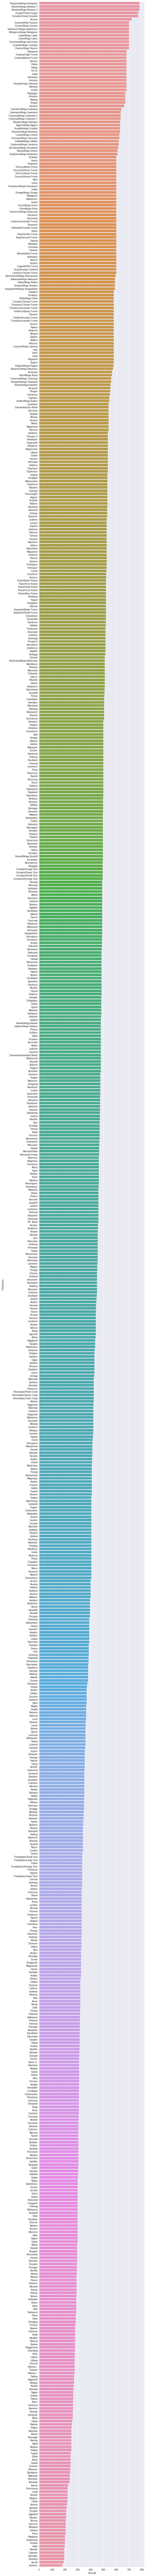

In [16]:
sns.set()
plt.figure(figsize=(8,200))
ax = sns.barplot(x='Total',y='Name',data=npoke_total.sort_values(by='Total', ascending=False))
ax.set(xlabel='Overall', ylabel='Pokemon')
plt.show()

NetworkX data analysis 
===

In [17]:
g = nx.Graph()

In [18]:
g = nx.from_pandas_dataframe(data,source='Name',target='Type 1')
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 818
Number of edges: 800
Average degree:   1.9560


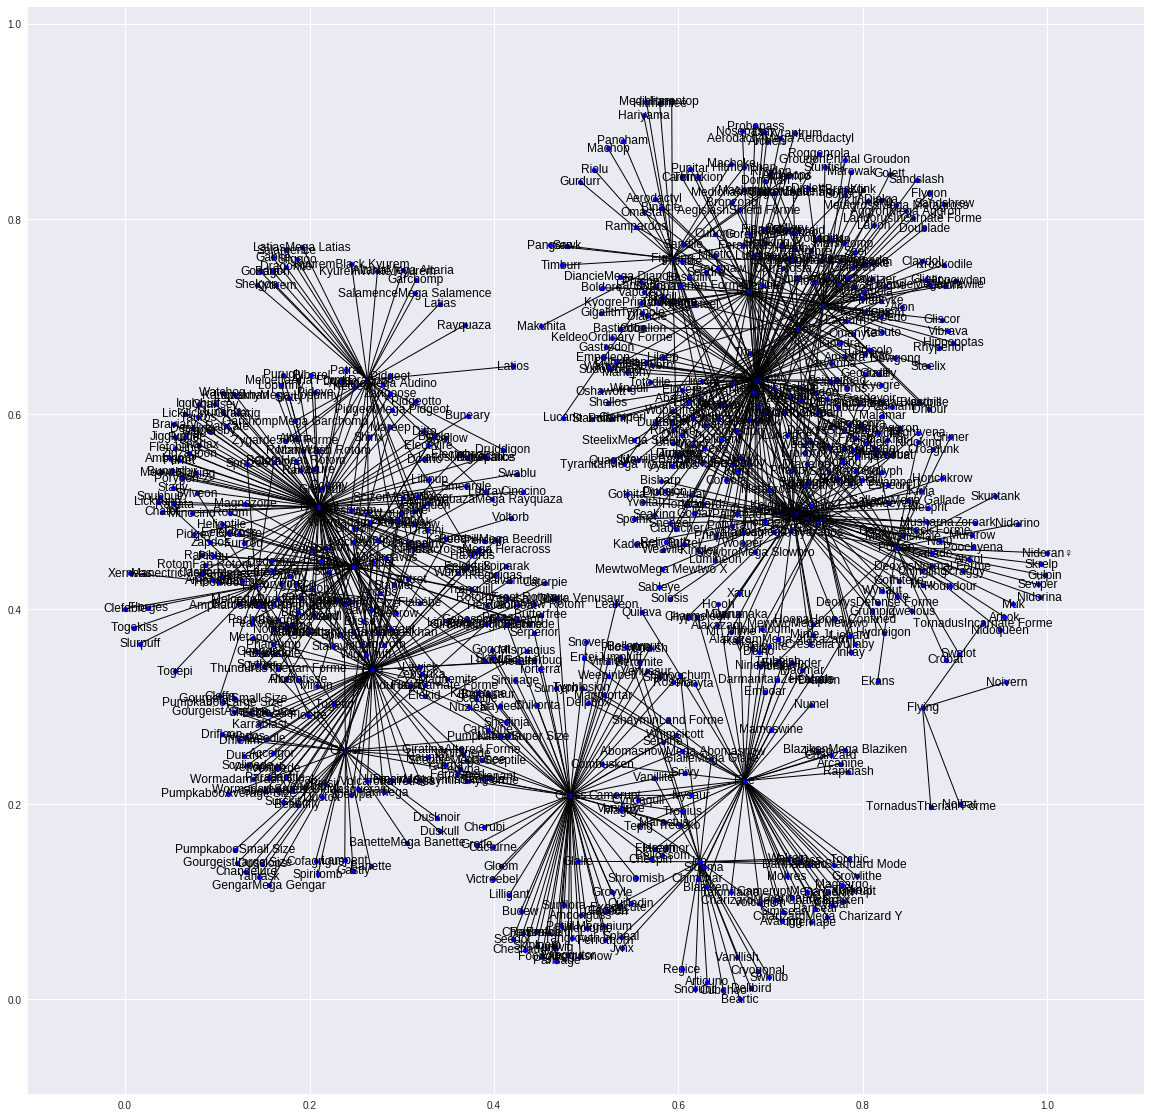

In [19]:
plt.figure(figsize=(20, 20))
pos=nx.spring_layout(g, k=0.15)
nx.draw_networkx(g,pos,node_size=25, node_color='blue')
plt.show()

Data for Generation 1: Types of POKEMON
===

In [20]:
gen1 = data[data.Generation == 1]

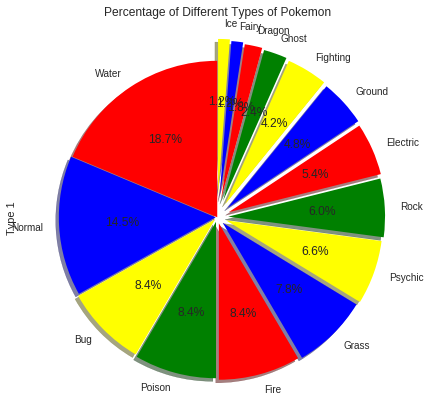

In [21]:
types = gen1['Type 1']
explode = np.arange(len(types.unique())) * 0.01

colors = [
    'red',
    'blue',
    'yellow',
    'green'
]
types.value_counts().plot.pie(
    explode=explode,
    colors=colors,
    title="Percentage of Different Types of Pokemon",
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    figsize=(6,6)
)
plt.tight_layout()
plt.show()

In [22]:
legendary_gen1 = gen1.groupby('Legendary').size()
print(legendary_gen1)

Legendary
False    160
True       6
dtype: int64


Percentage of Legendary to non-Legendary
===

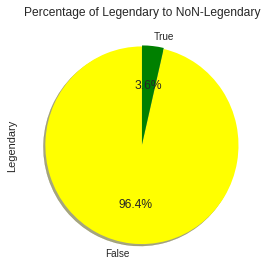

In [23]:
types = gen1['Legendary']
explode = np.arange(len(types.unique())) * 0.01

colors = [
    'yellow',
    'green'
]
types.value_counts().plot.pie(
    explode=explode,
    colors=colors,
    title="Percentage of Legendary to NoN-Legendary",
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    figsize=(4,4)
)
plt.tight_layout()
plt.show()

Lets do the legendary to non-legendary for the entire generations
===

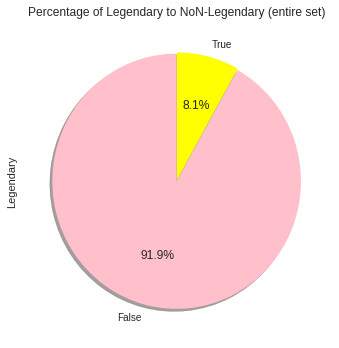

In [24]:
types = data['Legendary']
explode = np.arange(len(types.unique())) * 0.01

colors = [
    'pink',
    'yellow'
]
types.value_counts().plot.pie(
    explode=explode,
    colors=colors,
    title="Percentage of Legendary to NoN-Legendary (entire set)",
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    figsize=(5,5)
)
plt.tight_layout()
plt.show()

**Good stuff**

In [25]:
g = nx.from_pandas_dataframe(gen1,source='Name',target='Type 1')
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 181
Number of edges: 166
Average degree:   1.8343


In [26]:
nx.Graph()

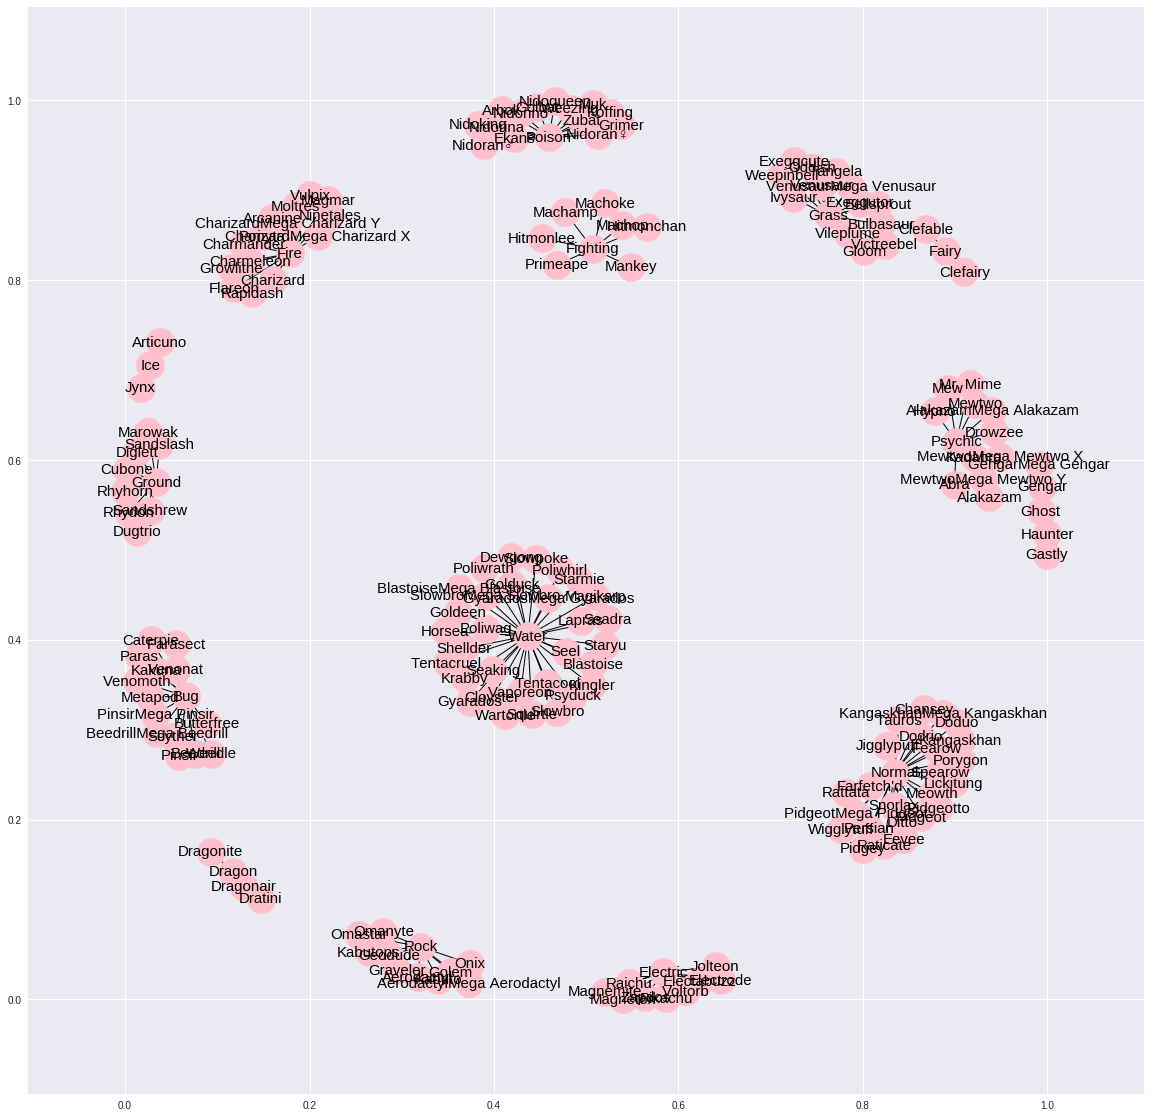

In [27]:
plt.figure(figsize=(20, 20))
pos=nx.spring_layout(g, k=0.0319)
nx.draw_networkx(g,pos,node_size=805, node_color='pink', font_size=15)
plt.show()

Generation 1 compare graph
===

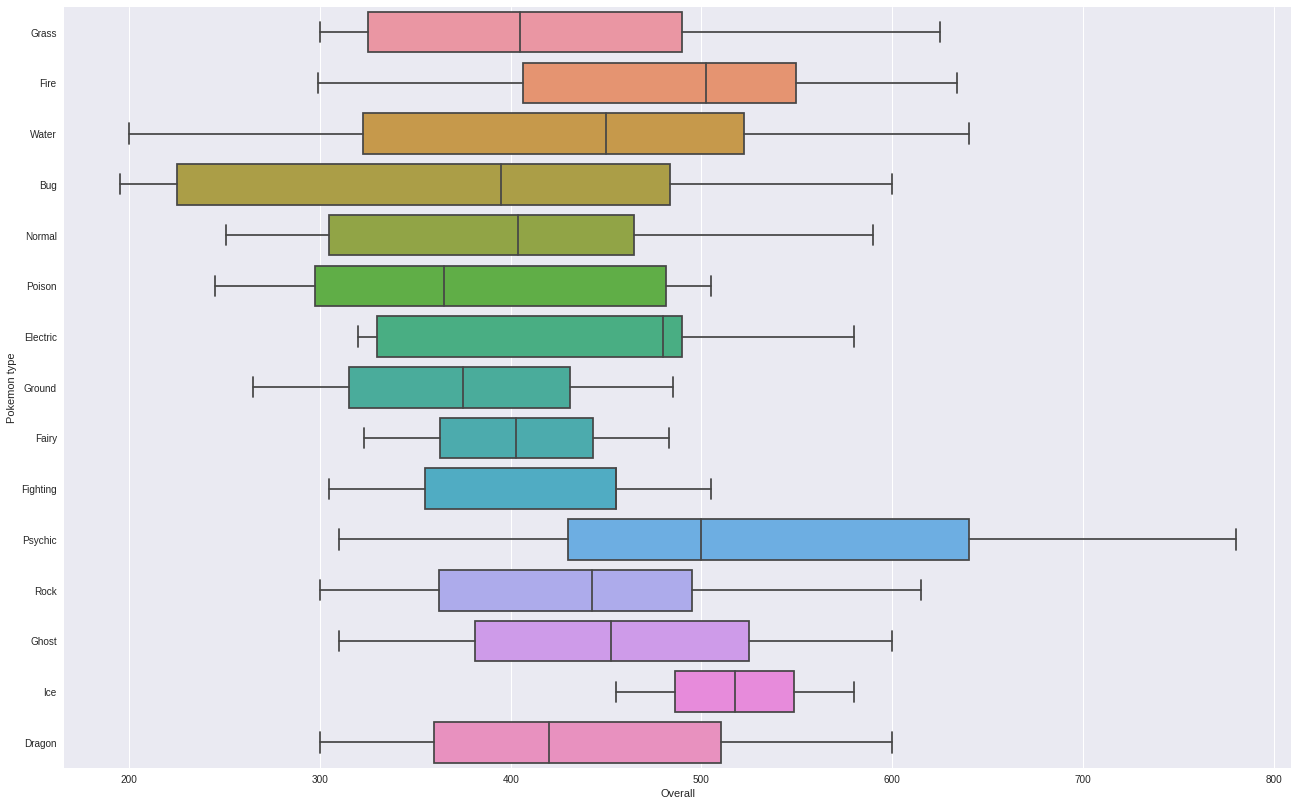

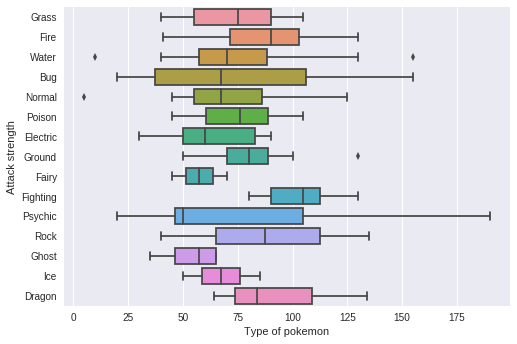

In [42]:
sns.set()
plt.figure(figsize=(22,14))
ax = sns.boxplot(x='Total',y='Type 1',data=gen1)
ax.set(ylabel='Pokemon type', xlabel='Overall')
plt.show()
lx = sns.boxplot(x='Attack', y='Type 1', data=gen1)
lx.set(xlabel='Type of pokemon', ylabel='Attack strength')
plt.show()

**Phychich seem to have the best overall performance in generation 1, while fighting gives the best attack damage**

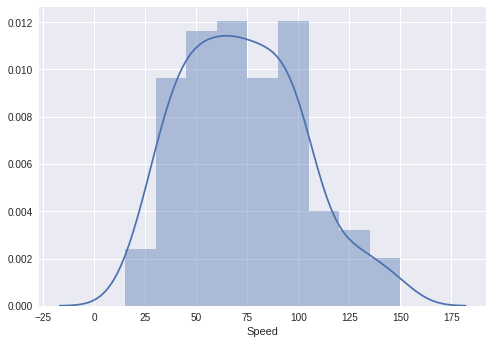

In [46]:
# Checking out overall speed
sns.distplot(gen1['Speed'])
plt.show();

In [50]:
# i love char
from IPython.display import Image
Image(url='http://img08.deviantart.net/fb0c/i/2013/082/7/5/004_charmander_by_pklucario-d5z1g9v.png')


WOOHOO
===